In [72]:
%matplotlib inline

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from collections import Counter 

import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [83]:
context = ['the', 'graph', 'isomorphism', 'problem', 'is', 'the', 'computational', 'problem', 'of', 'determining', 'whether', 'two', 'finite', 'graphs', 'are', 'isomorphic', '.', 'an', 'important', 'unsolved', 'problem', 'in', 'complexity', 'theory', 'is', 'whether', 'the', 'graph', 'isomorphism', 'problem', 'is', 'in', 'p', ',', 'np-complete', ',', 'or', 'np-intermediate', '.', 'the', 'answer', 'is', 'not', 'known', ',', 'but', 'it', 'is', 'believed', 'that', 'the', 'problem', 'is', 'at', 'least', 'not', 'np-complete', '.', 'if', 'graph', 'isomorphism', 'is', 'np-complete', ',', 'the', 'polynomial', 'time', 'hierarchy', 'collapses', 'to', 'its', 'second', 'level', '.', 'since', 'it', 'is', 'widely', 'believed', 'that', 'the', 'polynomial', 'hierarchy', 'does', 'not', 'collapse', 'to', 'any', 'finite', 'level', ',', 'it', 'is', 'believed', 'that', 'graph', 'isomorphism', 'is', 'not', 'np-complete', '.', 'the', 'best', 'algorithm', 'for', 'this', 'problem', ',', 'due', 'to', 'laszlo', 'babai', 'and', 'eugene', 'luks', 'has', 'run', 'time', '2o', '(', '\xe2\x88\x9a', '(', 'n', 'log', '(', 'n', ')', ')', ')', 'for', 'graphs', 'with', 'n', 'vertices', '.']
start = [0.0009534873533993959, 0.001078480971045792, 0.00018411588098388165, 0.00018650366109795868, 3.5576908885559533e-06, 0.00044638809049502015, 0.008660155348479748, 9.752689948072657e-05, 1.23929953588231e-06, 0.0007392966072075069, 0.00020889041479676962, 0.0016444198554381728, 0.0006531366379931569, 0.0005031605833210051, 4.007276220363565e-05, 0.05329052358865738, 2.2897927919984795e-05, 0.0002425007987767458, 0.0002786932745948434, 0.0019840265158563852, 6.884367758175358e-05, 3.0271248760982417e-05, 0.008330120705068111, 0.0002231857506558299, 7.851999725971837e-06, 0.00018999804160557687, 0.002040389459580183, 0.007458850275725126, 0.00047068842104636133, 0.0003375570522621274, 1.72116906469455e-05, 0.000496118504088372, 0.08129347115755081, 5.634909939544741e-06, 0.00880968663841486, 1.9810975118161878e-06, 4.523334064288065e-05, 0.0074732364155352116, 9.057346323970705e-05, 0.02408950962126255, 0.02325965091586113, 6.230478174984455e-05, 0.0007148239528760314, 0.0002703653008211404, 3.160007327096537e-05, 0.0002453002380207181, 0.0018692015437409282, 6.582856440218166e-05, 0.00019402553152758628, 0.00010379536979598925, 0.002399404300376773, 0.003460193984210491, 1.4736012417415623e-05, 0.00025645660934969783, 0.003998972941190004, 0.0017785149393603206, 0.16056407988071442, 4.6776942326687276e-05, 0.0038926126435399055, 0.007767971139401197, 0.0003244488616473973, 8.92561292857863e-05, 0.13578514754772186, 9.214880265062675e-06, 0.004597358871251345, 0.013057290576398373, 0.00020301331824157387, 0.0037922910414636135, 0.00024305649276357144, 5.246125510893762e-06, 0.00035865779500454664, 0.010777038522064686, 9.910450171446428e-05, 1.350399361399468e-05, 0.0001817401935113594, 0.0001384412171319127, 1.529660221422091e-05, 7.447837560903281e-05, 8.427147986367345e-05, 0.00023251198581419885, 0.0540505051612854, 0.2421138882637024, 0.0016556370537728071, 0.00020885338017251343, 0.00012642469664569944, 0.001529267174191773, 1.4504619684885256e-05, 0.0013579473597928882, 0.010240927338600159, 0.00029894206090830266, 8.564853487769142e-06, 0.0004475069872569293, 1.6968522686511278e-05, 7.52800187910907e-05, 0.0003040340670850128, 0.01611621119081974, 0.0001884910452645272, 4.988981527276337e-05, 0.0017565804300829768, 0.0688549056649208, 1.4975752492318861e-05, 0.0002581091539468616, 0.0005249559762887657, 9.362520358990878e-05, 1.72605666648451e-06, 3.598592957132496e-05, 0.00011244005872868001, 6.5096202206405e-07, 1.9942121070926078e-05, 8.258117304649204e-06, 0.00030036160023882985, 7.750802069494966e-06, 3.967398072290962e-07, 0.00018327926227357239, 5.196206257096492e-05, 6.451663921325235e-06, 0.00028015492716804147, 0.0007537236670032144, 0.001979915425181389, 4.330205047153868e-05, 0.0004342543543316424, 2.7514537578099407e-05, 0.00016431663243565708, 6.986220978433266e-05, 1.985493554457207e-06, 6.029441283317283e-05, 6.060033683752408e-07, 2.165277919630171e-06, 7.3674968916748185e-06, 1.7217305867234245e-05, 0.0009008962661027908, 6.4559103520878125e-06, 0.0003522848419379443, 7.697195542277768e-05, 7.0886185312701855e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
end = [1.3120924222675967e-06, 0.00013671691704075783, 0.0008557447581551969, 0.003262478159740567, 1.4290002354755416e-06, 2.8236061098141363e-06, 0.005437448155134916, 0.0017521082190796733, 4.6515827989423997e-07, 0.0005321878707036376, 1.6464147847727872e-05, 0.00019091714057140052, 0.00027457743999548256, 0.0025335156824439764, 3.5932941955252318e-06, 0.051712214946746826, 0.001165097113698721, 8.621130291430745e-06, 4.477946276892908e-05, 0.002312280936166644, 0.0003188219270668924, 4.233628260408295e-06, 0.004738259594887495, 0.007696549408137798, 3.745153662748635e-06, 1.7168531485367566e-05, 2.6682780571718467e-06, 0.0034798006527125835, 0.00395529018715024, 0.003322400152683258, 4.1397470340598375e-06, 3.4796394174918532e-06, 0.06107441335916519, 4.538575740298256e-05, 0.013625020161271095, 8.922270353650674e-05, 5.90176159676048e-06, 0.012181129306554794, 0.00191164028365165, 0.00043200395884923637, 0.047620151191949844, 4.3070151150459424e-05, 0.00040699829696677625, 0.001883835531771183, 0.0002907267480622977, 4.5437642256729305e-05, 0.00022771349176764488, 1.2875249922217336e-05, 6.462091550929472e-05, 3.1051613404997624e-06, 2.6813797830982367e-06, 0.003232202958315611, 6.482311619038228e-06, 1.4311038285086397e-05, 0.0009622228099033237, 0.0005096193053759634, 0.18851126730442047, 0.007186794653534889, 4.5806071284459904e-05, 0.001042401185259223, 0.0060821459628641605, 4.899914074485423e-06, 0.1622239649295807, 0.00022064601944293827, 7.983589966897853e-06, 0.010519127361476421, 0.0032499125227332115, 0.012511041946709156, 0.00047963805263862014, 5.543110432881804e-07, 3.45421403835644e-06, 0.006265825591981411, 0.020204445347189903, 0.0012630755081772804, 1.216950568050379e-05, 5.41443150723353e-05, 3.264314273110358e-06, 5.065330697107129e-05, 3.2184485462494195e-05, 4.115969659324037e-06, 2.3952316041686572e-05, 0.07141078263521194, 0.15465788543224335, 0.00011024039122276008, 3.1966752430889755e-05, 0.0025842103641480207, 1.056433688972902e-06, 2.396332820353564e-05, 0.0038902759552001953, 0.008509327657520771, 0.00022739468840882182, 1.7842065062723123e-05, 1.5616649307048647e-06, 1.0504845704417676e-05, 2.4132289127010154e-06, 0.0009132877457886934, 0.007391576189547777, 4.433775757206604e-06, 0.00010506989929126576, 0.07951708137989044, 0.0029204627498984337, 9.961698197002988e-06, 0.00024087696510832757, 0.0013324760366231203, 5.933644615652156e-07, 1.2363994983388693e-06, 0.00020138963009230793, 1.0669376933947206e-05, 4.288967261345533e-07, 2.632294382465261e-08, 2.129680615325924e-05, 9.048439824255183e-05, 9.823801292441203e-07, 2.0494144337135367e-05, 0.00026742074987851083, 3.3208254990313435e-07, 5.0008969992632046e-05, 4.941616134601645e-05, 0.00292377220466733, 4.559458375297254e-06, 0.0005371327861212194, 5.4216211538005155e-06, 2.989232052641455e-05, 0.00043183605885133147, 2.1919915980106452e-06, 0.0001322110474575311, 0.00028127082623541355, 0.00027861149283125997, 0.00020571041386574507, 1.5487785276491195e-07, 0.0007515165489166975, 3.7826549714736757e-07, 0.00010839423339348286, 0.000785798067227006, 0.0004061385116074234, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# context = context[:400]
start = start[:len(context)]
end = end[:len(context)]

print(len(context))
print(len(start))
print(len(end))

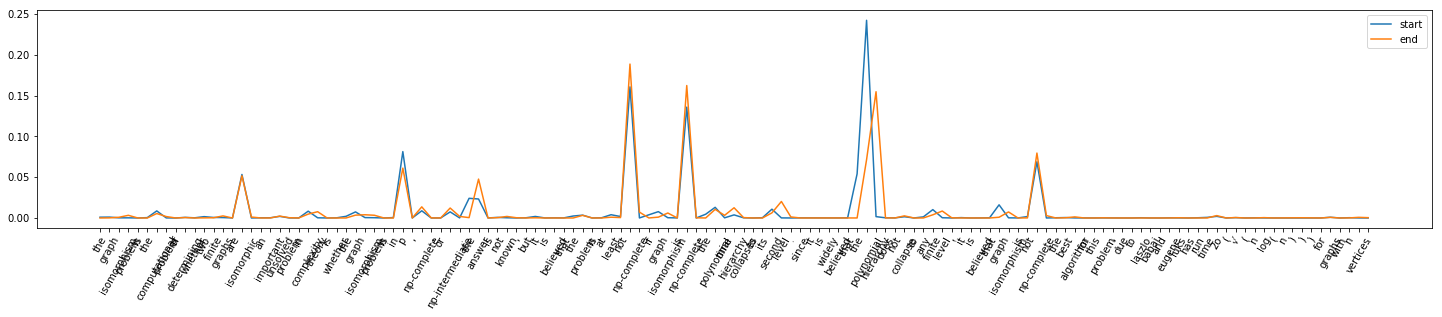

In [84]:
context_x = range(len(context))
plt.xticks(context_x, context)
plt.xticks(rotation=60)
plt.plot(context_x, start, label='start')
plt.plot(context_x, end, label ='end')
plt.legend()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 25
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.show()

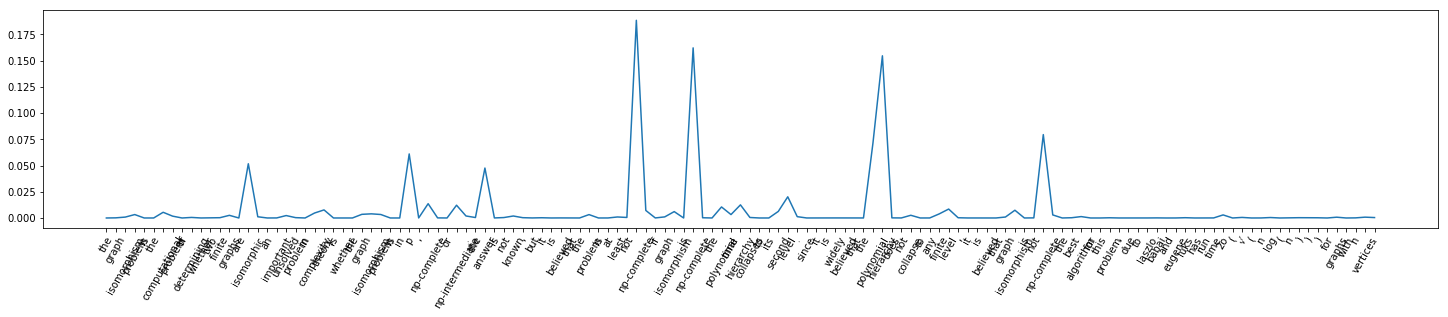

In [85]:
context_x = range(len(context))
plt.xticks(context_x, context)
plt.xticks(rotation=60)
plt.plot(context_x, end)

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 25
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.show()

In [35]:
"""
CONTEXT: (green text is true answer, magenta background is predicted start, red background is predicted end, _underscores_ are unknown tokens). Length: 700
the " freedom to provide services " under tfeu article 56 applies to people who give services " for remuneration " , especially commercial or professional activity . for example , in van _binsbergen_ v _bestuur_ van de _bedrijfvereniging_ voor de _metaalnijverheid_ a dutch lawyer moved to belgium while advising a client in a social security case , and was told he could not continue because dutch law said only people established in the netherlands could give legal advice . the court of justice held that the freedom to provide services applied , it was directly effective , and the rule was probably unjustified : having an address in the member state would be enough to pursue the legitimate aim of good administration of justice . the court of justice has held that secondary education falls outside the scope of article 56 , because usually the state funds it , though higher education does not . health care generally counts as a service . in _geraets-smits_ v stichting _ziekenfonds_ mrs _geraets-smits_ claimed she should be reimbursed by dutch social insurance for costs of receiving treatment in germany . the dutch health authorities regarded the treatment unnecessary , so she argued this restricted the freedom ( of the german health clinic ) to provide services . several governments submitted that hospital services should not be regarded as economic , and should not fall within article 56 . but the court of justice held health was a " service " even though the government ( rather than the service recipient ) paid for the service . national authorities could be justified in refusing to reimburse patients for medical services abroad if the health care received at home was without undue delay , and it followed " international medical science " on which treatments counted as normal and necessary . the court requires that the individual circumstances of a patient justify waiting lists , and this is also true in the context of the uk 's national health service . aside from public services , another sensitive field of services are those classified as illegal . _josemans_ v burgemeester van maastricht held that the netherlands ' regulation of cannabis consumption , including the prohibitions by some municipalities on tourists ( but not dutch nationals ) going to coffee shops , fell outside article 56 altogether . the court of justice reasoned that narcotic drugs were controlled in all member states , and so this differed from other cases where prostitution or other _quasi-legal_ activity was subject to restriction . if an activity does fall within article 56 , a restriction can be justified under article 52 or overriding requirements developed by the court of justice . in alpine investments bv v minister van _financiën_ a business that sold commodities futures ( with merrill lynch and another banking firms ) attempted to challenge a dutch law that prohibiting cold calling customers . the court of justice held the dutch prohibition pursued a legitimate aim to prevent " undesirable developments in securities trading " including protecting the consumer from aggressive sales tactics , thus maintaining confidence in the dutch markets . in omega _spielhallen_ gmbh v bonn a " _laserdrome_ " business was banned by the bonn council . it bought fake laser gun services from a uk firm called pulsar ltd , but residents had protested against " playing at killing " entertainment . the court of justice held that the german constitutional value of human dignity , which underpinned the ban , did count as a justified restriction on freedom to provide services . in liga portuguesa de futebol v santa casa da misericórdia de lisboa the court of justice also held that the state monopoly on gambling , and a penalty for a gibraltar firm that had sold internet gambling services , was justified to prevent fraud and gambling where people 's views were highly divergent . the ban was proportionate as this was an appropriate and necessary way to tackle the serious problems of fraud that arise over the internet . in the services directive a group of justifications were codified in article 16 that the case law has developed .
            QUESTION: what did the court of justice reason were controlled in all member states in josemans v burgemeester van maastricht ?
         TRUE ANSWER: narcotic drugs
    PREDICTED ANSWER: 
     F1 SCORE ANSWER: 0.000
            EM SCORE: False
"""

'\nsouthern california is home to many major business districts . central business districts ( cbd ) include downtown los angeles , downtown san diego , downtown san bernardino , downtown bakersfield , south coast metro and downtown riverside .\n            QUESTION: what is the only district in the cbd to not have " downtown " in it \'s name ?\n         TRUE ANSWER: south coast metro\n    PREDICTED ANSWER: central business districts\n     F1 SCORE ANSWER: 0.000\n            EM SCORE: False\n'

In [47]:
test = [1, 2, 3, 4, 5]
test[2:1]

[]